# Introduction
Linear Regression is the linear approach to modeling the relationship between a quantitative response ($y$) and one or more explanatory variables ($X$); also known as Response and Features, respectively.

This notebook focus on **Simple** and **Multiple Linear Model**, also covering **Flexible Linear Model** (higher order and interaction terms).

Let's load the data and necessary libraries. The toy dataset used in this example contain information on house prices and its characteristics, such as Neighborhood, square footage, # of bedrooms and bathrooms.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv("house_prices.csv")
df.drop(columns="house_id", inplace=True)
df.head(3)

,neighborhood,area,bedrooms,bathrooms,style,price
0,B,1188,3,2,ranch,598291
1,B,3512,5,3,victorian,1744259
2,B,1134,3,2,ranch,571669


## Correlation Coefficient, $R$
Measure of strength and direction of linear relationship between a pair of variables. Also know as Pearson's correlation coefficient.

+ Value varies between [-1, 1], representing negative and positive relationship
+ Strength:
    - $0 \leq R < 0.3$: Weak correlation
    - $0.3 \leq R < 0.7$: Moderate correlation
    - $R \geq 0.7$: Strong correlation

In [2]:
df.corr().style.background_gradient(cmap="Wistia")

,area,bedrooms,bathrooms,price
area,1,0.901623,0.891481,0.823454
bedrooms,0.901623,1,0.972768,0.743435
bathrooms,0.891481,0.972768,1,0.735851
price,0.823454,0.743435,0.735851,1


A scatter plot between two variables is a good way to visually inspect correlation:

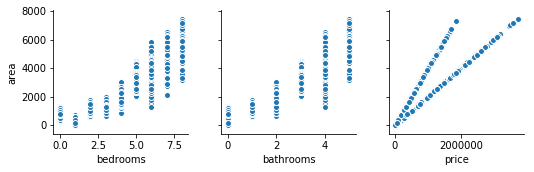

In [3]:
sns.pairplot(data=df, y_vars="area", x_vars=["bedrooms", "bathrooms", "price"]);

## Least Squares Algorithm
The main algorithm used to find the line that best fit the data. It minimizes the sum of squared vertical distance between the fitted line and the actual points. 
$$\sum^n_{i=1}(y_i - \hat y_i)^2$$

Basically, it tries to minimize the error.

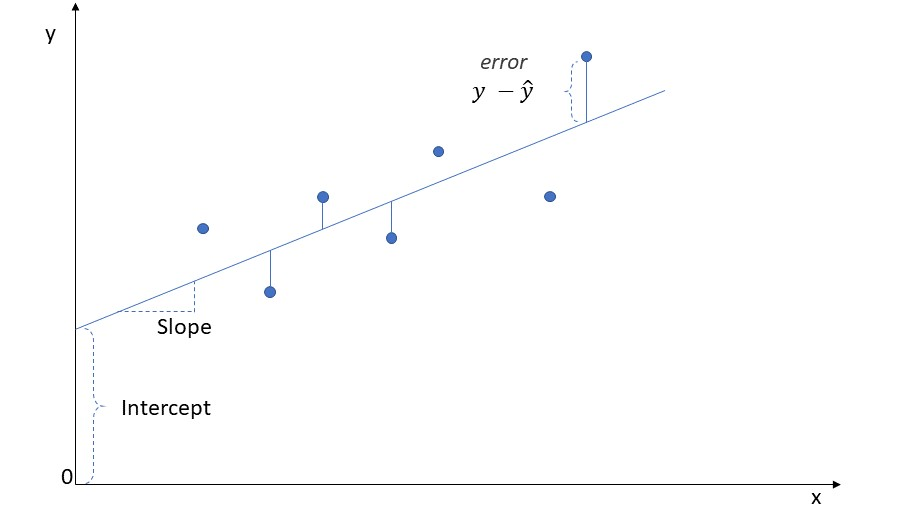

A **Simple Linear Regression** Model can be written as:
$$\hat y = b_0 + b_1.x_1 $$

Where,

+ $\hat y$: predicted response
+ $b_0$: intercept. Height of the fitted line when $x=0$. That is, no influence from explanatory variables
+ $b_1$: coefficient. The slope of the fitted line. Represents the **weight** of the explanatory variable

The Statsmodels package is a good way to obtain linear models, providing pretty and informative results, such as intercept, coefficients, p-value, and R-squared.
>**Note 1:** Statsmodels requires us to manually create an intercept = 1 so the algorithm can use it. Otherwise, the intercept is fixed at 0.

>**Note2:** Different than `Scikit-Learn`, `Statsmodels` requires the response variable as the first parameter.

In [4]:
import statsmodels.api as sm

df["intercept"] = 1
# Note how Statsmodels uses the order (y, X)
model = sm.OLS(df.price, df[["intercept", "area"]])
fitted_model = model.fit()
fitted_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.678      
Dependent Variable: price            AIC:                169038.2643
Date:               2019-04-05 20:09 BIC:                169051.6726
No. Observations:   6028             Log-Likelihood:     -84517.    
Df Model:           1                F-statistic:        1.269e+04  
Df Residuals:       6026             Prob (F-statistic): 0.00       
R-squared:          0.678            Scale:              8.8297e+10 
--------------------------------------------------------------------
             Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
--------------------------------------------------------------------
intercept  9587.8878 7637.4788   1.2554 0.2094 -5384.3028 24560.0784
area        348.4664    3.0930 112.6619 0.0000   342.4029   354.5298
--------------------------------------------------------------------
Omnibus:               368.609       Durbin-Watson:          2.007  
Prob(Omnibus):         0.000         Jarque-Bera (JB):       349.279
Skew:                  0.534         Prob(JB):               0.000  
Kurtosis:              2.499         Condition No.:          4928   
====================================================================
* The condition number is large (5e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

## Interpretation
In this simple example, we are tying to predict house prices as a function of their area (in square feet).

+ **intercept**: it means the starting point for every house is 9,588 price unit


+ **coefficient**: being a quantitative variable, it means that for every 1 area unit increase, we expect 345.5 increase in the price unit, on top of the intercept.


+ **p-value**: represents if a specific variable is significant in the model. If p-value > $\alpha$, then we can discard that variable from the model without significantly impacting its predictive power.

    It always test the following Hypothesis:
$$H_0: \beta =0 $$
$$H_1: \beta \neq 0$$


+ **R-squared**: it is a metric of model performance. Represents the amount of observations that can be explained by the model. In this case, 0.678 or 67.8%.
    - It is calculated as the square of the Correlation Coefficient, hence its value varies between [0, 1].

> **Note:** **R-squared** is a poor metric. Better and more robust forms of model evaluation are covered in a later section, such as accuracy, precision, and recall.

# Multiple Linear Regression
But it is also possible to incorporate more than just one explanatory variable in our linear model:

$$\hat y = b_0 + b_1.x_1 + b_2.x_2 + ... + b_n.x_n$$

Let's fit a linear model using all quantitative variables available:

In [5]:
df["intercept"] = 1
# Note how Statsmodels uses the order (y, X)
model = sm.OLS(df.price, df[["intercept", "area", "bedrooms", "bathrooms"]])
fitted_model = model.fit()
fitted_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:               OLS              Adj. R-squared:     0.678      
Dependent Variable:  price            AIC:                169041.9009
Date:                2019-04-05 20:09 BIC:                169068.7176
No. Observations:    6028             Log-Likelihood:     -84517.    
Df Model:            3                F-statistic:        4230.      
Df Residuals:        6024             Prob (F-statistic): 0.00       
R-squared:           0.678            Scale:              8.8321e+10 
---------------------------------------------------------------------
            Coef.     Std.Err.     t    P>|t|     [0.025     0.975]  
---------------------------------------------------------------------
intercept 10072.1070 10361.2322  0.9721 0.3310 -10239.6160 30383.8301
area        345.9110     7.2272 47.8627 0.0000    331.7432   360.0788
bedrooms  -2925.8063 10255.2414 -0.2853 0.7754 -23029.7495 17178.1369
bathrooms  7345.3917 14268.9227  0.5148 0.6067 -20626.8031 35317.5865
---------------------------------------------------------------------
Omnibus:              367.658        Durbin-Watson:           2.007  
Prob(Omnibus):        0.000          Jarque-Bera (JB):        350.116
Skew:                 0.536          Prob(JB):                0.000  
Kurtosis:             2.503          Condition No.:           11643  
=====================================================================
* The condition number is large (1e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

## Interpretation
Since the p-value of bedrooms and bathrooms is greater than $\alpha$ (0.05), it means these variables are not significant in the model. Which explains why the R-squared didn't improve after adding more features.

As a matter of fact, it is all about **multicollinearity**: as it happens, there is an <u>intrinsic correlation between these explanatory variables</u>.

>You would expect a house with more bedrooms and bathrooms to have a higher square footage!

It is also the reason behind the unexpected flipped sign for the bedrooms coefficient. 

>Just as well, you would expect a house with more bedrooms to become more and more expensive; not cheaper!

This and other **potential modeling problems** will be covered later with more details. But basically, in situations like this, we would remove the correlated features from our model, retaining only the the "most important one". 

The *"most important one"* can be understood as:
+ A specific variable we have particular interest in understanding/capturing
+ A more granular variable, allowing for a better representation of the characteristics our model is trying to capture
+ A variable easier to obtain

In this case, let's discard the others quantitative variables and use only **area** as predictor in the model:

In [6]:
df["intercept"] = 1
# Note how Statsmodels uses the order (y, X)
model = sm.OLS(df.price, df[["intercept", "area"]])
fitted_model = model.fit()
fitted_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.678      
Dependent Variable: price            AIC:                169038.2643
Date:               2019-04-05 20:09 BIC:                169051.6726
No. Observations:   6028             Log-Likelihood:     -84517.    
Df Model:           1                F-statistic:        1.269e+04  
Df Residuals:       6026             Prob (F-statistic): 0.00       
R-squared:          0.678            Scale:              8.8297e+10 
--------------------------------------------------------------------
             Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
--------------------------------------------------------------------
intercept  9587.8878 7637.4788   1.2554 0.2094 -5384.3028 24560.0784
area        348.4664    3.0930 112.6619 0.0000   342.4029   354.5298
--------------------------------------------------------------------
Omnibus:               368.609       Durbin-Watson:          2.007  
Prob(Omnibus):         0.000         Jarque-Bera (JB):       349.279
Skew:                  0.534         Prob(JB):               0.000  
Kurtosis:              2.499         Condition No.:          4928   
====================================================================
* The condition number is large (5e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

## Interpretation
The adjusted R-squared remained at 0.678, indicating we didn't lose much by dropping **bedrooms** and **bathrooms** from our model.

So, considering the quantitative variables available, we should only use **area**. 

But what about the categorical variables?

# Working with Categorical Data
So far we have only worked with quantitative variables in our examples. But it is also possible to work with Categorical data, such as Neighborhood or Style.

We can use Hot-One encoding, creating new dummy variables receiving value of 1 if the category is true, or 0 otherwise.

We can easily implement this by using the `pandas.get_dummies` function.

>**Note**: we use the `pd.get_dummies` function inside the `df.join`, in order to add the created columns to the already existing dataframe.

In [7]:
df = df.join(pd.get_dummies(df.neighborhood, prefix="neighb"))
df = df.join(pd.get_dummies(df["style"], prefix="style"))

In [8]:
df.head(2)

,neighborhood,area,bedrooms,bathrooms,style,price,intercept,neighb_A,neighb_B,neighb_C,style_lodge,style_ranch,style_victorian
0,B,1188,3,2,ranch,598291,1,0,1,0,0,1,0
1,B,3512,5,3,victorian,1744259,1,0,1,0,0,0,1


But before we can incorporate the categorical data in the model, it is necessary to make sure the selected features $X$ are <u>Full Rank</u>. That is, <u>all explanatory variables are linearly independent</u>.

>If a dummy variable holds the value 1, it specifies the value for the categorical variable. But we can just as easily identify it if all other dummy variables are 0.

Therefore, all we need to do is leave one of the dummy variables out of the model - for each group of categorical variable.
This "left out" variable will be the **baseline** for comparison among the others from the same category.

Let's use only *Neighborhood* (A, B, C) and *Style* (Victorian, Lodge, Ranch) in our model:

In [9]:
df.columns

Index(['neighborhood', 'area', 'bedrooms', 'bathrooms', 'style', 'price',
       'intercept', 'neighb_A', 'neighb_B', 'neighb_C', 'style_lodge',
       'style_ranch', 'style_victorian'],
      dtype='object')

In [10]:
# neighborhood Baseline = A
# style Baseline = Victorian
feature_list = ["intercept", "neighb_B", "neighb_C", "style_lodge", "style_ranch"]

# Note how Statsmodels uses the order (y, X)
model = sm.OLS(df.price, df[feature_list])
fitted_model = model.fit()
fitted_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
=============================================================================
Model:                 OLS                 Adj. R-squared:        0.584      
Dependent Variable:    price               AIC:                   170590.6058
Date:                  2019-04-05 20:09    BIC:                   170624.1267
No. Observations:      6028                Log-Likelihood:        -85290.    
Df Model:              4                   F-statistic:           2113.      
Df Residuals:          6023                Prob (F-statistic):    0.00       
R-squared:             0.584               Scale:                 1.1417e+11 
-----------------------------------------------------------------------------
               Coef.      Std.Err.     t     P>|t|     [0.025       0.975]   
-----------------------------------------------------------------------------
intercept    836696.6000  8960.8404  93.3726 0.0000  819130.1455  854263.0546
neighb_B     524695.6439 10388.4835  50.5074 0.0000  504330.4978  545060.7899
neighb_C      -6685.7296 11272.2342  -0.5931 0.5531  -28783.3433   15411.8841
style_lodge -737284.1846 11446.1540 -64.4133 0.0000 -759722.7434 -714845.6259
style_ranch -473375.7836 10072.6387 -46.9962 0.0000 -493121.7607 -453629.8065
-----------------------------------------------------------------------------
Omnibus:                 930.122          Durbin-Watson:             2.010   
Prob(Omnibus):           0.000            Jarque-Bera (JB):          2984.126
Skew:                    0.787            Prob(JB):                  0.000   
Kurtosis:                6.067            Condition No.:             4       
=============================================================================

"""

## Interpretation
Using both categorical data at the same time, our model resulted in an R-squared of 0.584. Which is less than before using only quantitative data, but means there is some explanatory power to these categorical variables.

All variables seem to be significant, with p-value < $\alpha$. Except for Neighborhood C. 
>This means `neighb_C` is not statistically significant <u>in comparison to the **baseline**</u>, `neighb_A`.

>To interpret the significance between a dummy and the other variables, we look at the <u>confidence interval</u> (given by [0.025 and 0.975]): if they do not overlap, then it is considered significant. In this case, `neighb_C` is significant to the model, just not when compared to the baseline... suggesting that **Neighborhood A** shares the same characteristics of **Neighborhood C**.

+ **intercept**: represents the impact of the Baselines. In this case, we expect a *Victorian* house located in *Neighborhood A* to cost *836,696* price unit.

+ **Coefficients**: since we only have dummy variables, they are interpreted against their own category *baseline*
    - **neighb_B**: we predict a house in *Neighborhood B* to cost *524,695* more than in *Neighborhood A* (baseline). For a *Victorian* house, it would cost *836,696 + 524,695 = 1,361,391* price unit.
    - **neighb_C**: since its p-value > $\alpha$, it is not significant compared to the baseline - so we ignore the interpretation of this coefficient
    - **style_lodge**: we predict a *Lodge* house to cost *737,284* less than a *Victorian* (baseline). In *Neighborhood A*, it would cost *836,696 - 737,284 = 99,412* price unit
    - **style_ranch**: we predict a *Ranch* to cost *473,375* less than a *Victorian* (baseline). In *Neighborhood A*, it would cost *836,696 - 473,375 = 363,321* price unit

# Putting it all together
Now that we covered how to work with and interpret quantitative and categorical variables, it is time to put it all together:

>**Note**: we leave **Neighborhood C** out of the model, since our previous regression - using only categorical variables - showed it to be insignificant.

In this case, **Neighborhood A** is no longer the Baseline and needs to be explicitly added to the model:

In [11]:
# style Baseline = Victorian
feature_list = [
    "intercept",
    "area",
    "neighb_A",
    "neighb_B",
    "style_lodge",
    "style_ranch",
]

# Note how Statsmodels uses the order (y, X)
model = sm.OLS(df.price, df[feature_list])
fitted_model = model.fit()
fitted_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                  OLS                Adj. R-squared:       0.919      
Dependent Variable:     price              AIC:                  160707.1908
Date:                   2019-04-05 20:09   BIC:                  160747.4158
No. Observations:       6028               Log-Likelihood:       -80348.    
Df Model:               5                  F-statistic:          1.372e+04  
Df Residuals:           6022               Prob (F-statistic):   0.00       
R-squared:              0.919              Scale:                2.2153e+10 
----------------------------------------------------------------------------
               Coef.      Std.Err.    t     P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------
intercept   -204570.6449 7699.7035 -26.5686 0.0000 -219664.8204 -189476.4695
area            348.7375    2.2047 158.1766 0.0000     344.4155     353.0596
neighb_A       -194.2464 4965.4594  -0.0391 0.9688   -9928.3245    9539.8317
neighb_B     524266.5778 4687.4845 111.8439 0.0000  515077.4301  533455.7254
style_lodge    6262.7365 6893.2931   0.9085 0.3636   -7250.5858   19776.0588
style_ranch    4288.0333 5367.0317   0.7990 0.4243   -6233.2702   14809.3368
----------------------------------------------------------------------------
Omnibus:                 114.369          Durbin-Watson:             2.002  
Prob(Omnibus):           0.000            Jarque-Bera (JB):          139.082
Skew:                    0.271            Prob(JB):                  0.000  
Kurtosis:                3.509            Condition No.:             13461  
============================================================================
* The condition number is large (1e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

Looks like **Neighborhood A** is not significant to the model. Let's remove it and interpret the results again:

In [12]:
# style Baseline = Victorian
feature_list = ["intercept", "area", "neighb_B", "style_lodge", "style_ranch"]

# Note how Statsmodels uses the order (y, X)
model = sm.OLS(df.price, df[feature_list])
fitted_model = model.fit()
fitted_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                  OLS                Adj. R-squared:       0.919      
Dependent Variable:     price              AIC:                  160705.1923
Date:                   2019-04-05 20:09   BIC:                  160738.7132
No. Observations:       6028               Log-Likelihood:       -80348.    
Df Model:               4                  F-statistic:          1.715e+04  
Df Residuals:           6023               Prob (F-statistic):   0.00       
R-squared:              0.919              Scale:                2.2149e+10 
----------------------------------------------------------------------------
               Coef.      Std.Err.    t     P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------
intercept   -204669.1638 7275.5954 -28.1309 0.0000 -218931.9350 -190406.3926
area            348.7368    2.2045 158.1954 0.0000     344.4152     353.0583
neighb_B     524367.7695 3908.8100 134.1502 0.0000  516705.1029  532030.4361
style_lodge    6259.1344 6892.1067   0.9082 0.3638   -7251.8617   19770.1304
style_ranch    4286.9410 5366.5142   0.7988 0.4244   -6233.3477   14807.2296
----------------------------------------------------------------------------
Omnibus:                 114.373          Durbin-Watson:             2.002  
Prob(Omnibus):           0.000            Jarque-Bera (JB):          139.090
Skew:                    0.271            Prob(JB):                  0.000  
Kurtosis:                3.509            Condition No.:             13175  
============================================================================
* The condition number is large (1e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

Looking at the high p-values of **style_lodge** and **style_ranch**, they do not seem to be significant in our model.

Let's regress our model again, removing **style_lodge**.
>**Note**: since we are removing Lodge, Victorian style no longer is the baseline, hence we have to explicitly add it to the model

In [13]:
feature_list = ["intercept", "area", "neighb_B", "style_victorian", "style_ranch"]

# Note how Statsmodels uses the order (y, X)
model = sm.OLS(df.price, df[feature_list])
fitted_model = model.fit()
fitted_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS                  Adj. R-squared:         0.919      
Dependent Variable:     price                AIC:                    160705.1923
Date:                   2019-04-05 20:09     BIC:                    160738.7132
No. Observations:       6028                 Log-Likelihood:         -80348.    
Df Model:               4                    F-statistic:            1.715e+04  
Df Residuals:           6023                 Prob (F-statistic):     0.00       
R-squared:              0.919                Scale:                  2.2149e+10 
--------------------------------------------------------------------------------
                   Coef.      Std.Err.    t     P>|t|     [0.025       0.975]   
--------------------------------------------------------------------------------
intercept       -198410.0294 4886.8434 -40.6009 0.0000 -207989.9917 -188830.0672
area                348.7368    2.2045 158.1954 0.0000     344.4152     353.0583
neighb_B         524367.7695 3908.8100 134.1502 0.0000  516705.1029  532030.4361
style_victorian   -6259.1344 6892.1067  -0.9082 0.3638  -19770.1304    7251.8617
style_ranch       -1972.1934 5756.6924  -0.3426 0.7319  -13257.3710    9312.9843
--------------------------------------------------------------------------------
Omnibus:                   114.373           Durbin-Watson:              2.002  
Prob(Omnibus):             0.000             Jarque-Bera (JB):           139.090
Skew:                      0.271             Prob(JB):                   0.000  
Kurtosis:                  3.509             Condition No.:              10991  
================================================================================
* The condition number is large (1e+04). This might indicate             strong
multicollinearity or other numerical problems.
"""

Once again, neither Victorian nor Ranch proved to be significant in the model.

Let's remove **style_ranch**:

In [14]:
feature_list = ["intercept", "area", "neighb_B", "style_victorian"]

# Note how Statsmodels uses the order (y, X)
model = sm.OLS(df.price, df[feature_list])
fitted_model = model.fit()
fitted_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS                  Adj. R-squared:         0.919      
Dependent Variable:     price                AIC:                    160703.3098
Date:                   2019-04-05 20:09     BIC:                    160730.1265
No. Observations:       6028                 Log-Likelihood:         -80348.    
Df Model:               3                    F-statistic:            2.287e+04  
Df Residuals:           6024                 Prob (F-statistic):     0.00       
R-squared:              0.919                Scale:                  2.2146e+10 
--------------------------------------------------------------------------------
                   Coef.      Std.Err.    t     P>|t|     [0.025       0.975]   
--------------------------------------------------------------------------------
intercept       -199292.0351 4153.3840 -47.9831 0.0000 -207434.1541 -191149.9162
area                348.5163    2.1083 165.3055 0.0000     344.3833     352.6494
neighb_B         524359.1981 3908.4435 134.1606 0.0000  516697.2501  532021.1461
style_victorian   -4716.5525 5217.5622  -0.9040 0.3660  -14944.8416    5511.7367
--------------------------------------------------------------------------------
Omnibus:                   118.288           Durbin-Watson:              2.002  
Prob(Omnibus):             0.000             Jarque-Bera (JB):           143.564
Skew:                      0.278             Prob(JB):                   0.000  
Kurtosis:                  3.512             Condition No.:              6807   
================================================================================
* The condition number is large (7e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

Looks like the house style is not significant at all in our model.

Let's also remove Style Victorian from our explanatory variables:

In [15]:
feature_list = ["intercept", "area", "neighb_B"]

# Note how Statsmodels uses the order (y, X)
model = sm.OLS(df.price, df[feature_list])
fitted_model = model.fit()
fitted_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:                OLS                Adj. R-squared:       0.919      
Dependent Variable:   price              AIC:                  160702.1274
Date:                 2019-04-05 20:09   BIC:                  160722.2399
No. Observations:     6028               Log-Likelihood:       -80348.    
Df Model:             2                  F-statistic:          3.430e+04  
Df Residuals:         6025               Prob (F-statistic):   0.00       
R-squared:            0.919              Scale:                2.2146e+10 
--------------------------------------------------------------------------
             Coef.      Std.Err.    t     P>|t|     [0.025       0.975]   
--------------------------------------------------------------------------
intercept -198881.7929 4128.4536 -48.1734 0.0000 -206975.0391 -190788.5467
area          347.2235    1.5490 224.1543 0.0000     344.1868     350.2602
neighb_B   524377.5839 3908.3313 134.1692 0.0000  516715.8561  532039.3117
--------------------------------------------------------------------------
Omnibus:                 125.346         Durbin-Watson:            2.002  
Prob(Omnibus):           0.000           Jarque-Bera (JB):         152.989
Skew:                    0.287           Prob(JB):                 0.000  
Kurtosis:                3.528           Condition No.:            6083   
==========================================================================
* The condition number is large (6e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

## Interpretation
Finally, all features are significant (p-value < $\alpha$).

Interestingly, the adjusted R-squared never changed through the process of eliminating insignificant explanatory variables, meaning these final ones are indeed the most important ones for predicting house price.

Basically, it means that for every 1 area unit increase, we expect an increase of 347 price unit. If a house is situated in Neighborhood B, we expect it to cost, on average, 524,377 more than in Neighborhoods A or C.

Even though the intercept has a negative value, this equation resulted in the best predicting performance so far (adjusted R-squared of 0.919). One can argue that every house - even the smallest one - still have area greater than 0. For houses in Neighborhood A and C with square footage greater than 580, we start to predict positive values for price.

# Flexible Linear Models
The linear model is also capable of incorporating non-linear relationships between the explanatory variables and the response, such as: **Higher Order** and **Interaction**

### Higher Order
Whenever there is a clear curve-like pattern between the pair plot of an explanatory variable $x_i$ and the response $y$
+ the higher order should always be the amount of peaks + 1. For example, in a U shaped pair plot, there is 1 peak, hence the feature should be of order 2: $x_i^2$


+ whenever using higher order terms in the model, always include the lower order terms as well. In this example of order 2, we would have the following terms: $\hat y = b_0 + b_1.x_1 + b_2.x_1^2$


### Interaction
Whenever the relationship between a feature ($x_1$) and the response ($y$) change according to another feature ($x_2$)
+ the need for an **interaction** term can be visually investigated by adding the *hue* parameter to the typical pair plot. If the relationship of $x_1$ and $y$ have different slopes based on $x_2$, then we should add the interaction term: $x_1.x_2$


+ Similarly to higher order, if implemented in the model, it is also necessary to add the "lower" terms, so the model would look like this: $\hat y = b_0 + b_1.x_1 + b_2.x_2 + b_3.x_1.x_2$

### Downside
But there is a huge caveat: while the prediction power of the linear model improves by adding flexibility (higher order and interaction), it loses the ease of interpretation of the coefficients.

It is no longer straightforward - as seen in the previous models - to interpret the impact of quantitative or categorical variables. Any change in the explanatory variable would be reflected in the simple term, $b_1.x_1$ as well as the higher order one, $b_2.x_1^2$.

Enter the trade-off of linear models: flexible terms might improve model performance, but at the cost of interpretability.

>If you are interested in <u>understanding the impact</u> of each variable over the response, it is recommended to shy away from using more flexible terms.

>... and if you are only interested in <u>making accurate predictions</u>, than Linear Models would not be your best bet anyway!

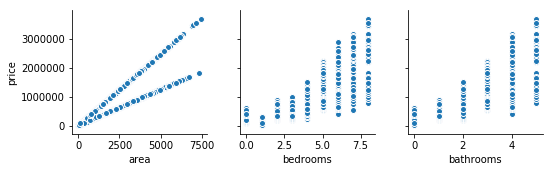

In [16]:
sns.pairplot(data=df, y_vars="price", x_vars=["area", "bedrooms", "bathrooms"]);

The relationship between the features and the response does not present any curves. Hence, there is no base to implement a higher order term in the model.

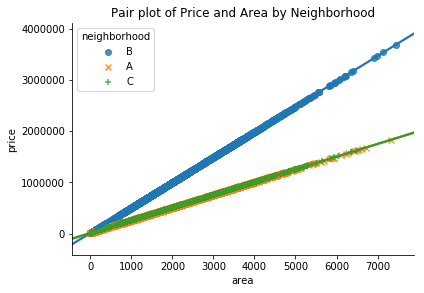

In [17]:
# Pair plot by Neighborhood
sns.lmplot(
    x="area",
    y="price",
    data=df,
    hue="neighborhood",
    size=4,
    markers=["o", "x", "+"],
    legend_out=False,
    aspect=1.5,
)
plt.title("Pair plot of Price and Area by Neighborhood");

It is clear to see in the image above that the relationship between **area** and **price** does vary based on the **neighborhood**. Which suggests we should add the interaction term.

In this particular case, Neighborhood A and C have the exact same behavior. Therefore, we only need to verify whether the house is located in Neighborhood B or not (using the dummy variable, **neighb_B**).

In [18]:
# Creating interaction term to be incorporated in the model
df["area_neighb"] = df.area * df.neighb_B

In [19]:
df["intercept"] = 1
features_list = ["intercept", "area", "neighb_B", "area_neighb"]
model = sm.OLS(df.price, df[features_list])
fitted_model = model.fit()
fitted_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:                 OLS               Adj. R-squared:      1.000     
Dependent Variable:    price             AIC:                 71986.6799
Date:                  2019-04-05 20:09  BIC:                 72013.4966
No. Observations:      6028              Log-Likelihood:      -35989.   
Df Model:              3                 F-statistic:         6.131e+10 
Df Residuals:          6024              Prob (F-statistic):  0.00      
R-squared:             1.000             Scale:               8986.8    
------------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025     0.975]  
------------------------------------------------------------------------
intercept   12198.0608   3.1492   3873.3747 0.0000 12191.8872 12204.2343
area          248.1610   0.0013 194094.9191 0.0000   248.1585   248.1635
neighb_B      132.5642   4.9709     26.6682 0.0000   122.8195   142.3089
area_neighb   245.0016   0.0020 121848.3887 0.0000   244.9976   245.0055
------------------------------------------------------------------------
Omnibus:               214.393         Durbin-Watson:            1.979  
Prob(Omnibus):         0.000           Jarque-Bera (JB):         398.418
Skew:                  -0.277          Prob(JB):                 0.000  
Kurtosis:              4.131           Condition No.:            12098  
========================================================================
* The condition number is large (1e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

## Interpretation
Our best model performance, with an impressive adjusted R-squared of 100%. All variables are significant and their signs match the expected direction (positive).

Although the interpretation is not as easy as before, we can still try to make some sense out of it because this a special case of interaction, involving a binary variable.

+ **intercept**: we expect all houses to have the initial price of 12,198 price unit.
+ **Coefficients**:
    - for houses in Neighborhood A and C, we expect the price to increase by 248 price unit for every additional area unit. So, the average price of a house of 120 sqft situated in Neighborhood A or C is: $12,198 + 248*120 = 41,958$
    - for houses in Neighborhood B, we expect the price to increase by **493**  (*248* + *245*) price unit for every additional area unit. There would also be an additional 132 price unit on top of the intercept, independent of the area. So the average price of a house of 120 sqft located in Neighborhood B is: $12,198 + (132) + 120*(248 + 245) = 71,490$